## Initialization

### Imports

In [167]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, replace

### Enemies

In [168]:
@dataclass
class Creature:
    hp: int
    armor: tuple[int, int]
    accuracy: int
    evasion: int
    damage: tuple[int, int]
    name: str
    attack_speed: float = 1.0

class Creatures:
    rat = Creature(8,(0,1), 8, 2, (1,4), "rat")
    snake = Creature(4,(0,0), 10, 25, (1,4), "snake")
    gnoll = Creature(12,(0,2), 10, 4, (1,6), "gnoll")
    crab = Creature(15,(0,4), 12, 5, (1,7), "crab")
    slime = Creature(20,(0,0), 12, 5, (2,5), "slime")
    flies = Creature(50,(0,0), 10, 5, (1,4), "swarm of flies")
    skeleton = Creature(25,(0,5), 12, 9, (2,10), "skeleton")
    thief = Creature(20,(0,3), 12, 12, (1,10), "crazy thief", attack_speed=0.5)
    necromancer = Creature(40,(0,5), 12, 14, (2,10), "necromancer")
    guard = Creature(40,(0,7), 12, 10, (4,12), "guard")
    dm100 = Creature(20,(0,4), 11, 8, (2,8), "DM100")
    bat = Creature(30,(0,4), 16, 15, (5,18), "vampire bat")
    brute = Creature(40,(0,8), 20, 15, (5,25), "gnoll brute")
    shaman = Creature(35,(0,6), 18, 15, (5,10), "gnoll shaman")
    spider = Creature(50,(0,6), 20, 14, (10,20), "cave spider")
    dm200 = Creature(80,(0,8), 25, 8, (10,25), "DM200")
    ghoul = Creature(45,(0,4), 24, 20, (16,22),"dwarven ghoul")
    elemental = Creature(65,(0,5), 25, 20, (20,25), "elemental")
    warlock = Creature(70,(0,8), 25, 18, (16,22), "dwarf warlock")
    monk = Creature(68,(0,2), 30, 30, (12,25), "dwarf monk", attack_speed=0.5)
    golem = Creature(120,(0,12), 28, 15, (25,30), "golem")
    succubus = Creature(80,(0,10), 40, 25, (25,30), "succubus")
    eye = Creature(100,(0,10), 30, 20, (20,30), "evil eye")
    scorpio = Creature(110,(0,16), 36, 24, (30,40), "scorpio")
    demon = Creature(60,(0,4), 30, 22, (15,25), "demon ripper", attack_speed=0.5)
    goo = Creature(120,(0,2), 10, 8, (1,8), "Goo")
    goo_enraged = Creature(120,(0,2), 15, 8 * 1.5, (1,12), "Goo (enraged)")
    tengu = Creature(250,(0,5), 20, 15, (6,12), "Tengu")
    dm300 = Creature(400,(0,10), 20, 15, (15,25), "DM300")
    dk = Creature(450,(0,10), 26, 22, (15,25), "Dwarf King")
    fist = Creature(300,(0,15), 36, 20, (18,36), "Yog Fist")


### Equipment

In [169]:
from dataclasses import dataclass

class ArmorAugment:
    NONE = (0, 0)
    DEFENSE = (-2, 1)
    EVASION = (2, -1)

class WeaponAugment:
    SPEED = (0.7, 2/3)
    DAMAGE = (1.5, 5/3)
    NONE = (1, 1)

@dataclass
class Armor():
    base_defense: tuple[int, int]
    defense_scaling: tuple[int, int]
    strength: int
    name: str

@dataclass
class ArmorInstance:
    armor: Armor
    upgrade: int
    augment: ArmorAugment
    isStone: bool = False

    def _get_augment_phrase(self):
        armor_augment_phrase = ""
        if self.augment == ArmorAugment.DEFENSE:
            armor_augment_phrase = " (defense)"
        elif self.augment == ArmorAugment.EVASION:
            armor_augment_phrase = " (evasion)"
        return armor_augment_phrase

    def get_name_and_aug(self):
        return f'{self.armor.name}{self._get_augment_phrase()}'

    def get_full_name(self):
        
        return f'+{self.upgrade} {self.get_name_and_aug()}'


# base damage of armor
class Armors:
    cloth = Armor((0, 2), (0, 1), 10, "cloth armor")
    leather = Armor((0, 3), (0, 1), 12, "leather armor")
    mail = Armor((0, 4), (0, 1), 14, "mail armor")
    scale = Armor((0, 5), (0, 1), 16, "scale armor")
    plate = Armor((0, 6), (0, 1), 18, "plate armor")

@dataclass
class Weapon:
    base_damage: tuple[int, int]
    damage_scaling: tuple[int, int]
    strength: int
    name: str
    accuracy_multiplier: float = 1
    delay: float = 1
    defense: tuple[int, int] = (0, 0)
    defense_scaling: tuple[int, int] = (0, 0)

@dataclass
class WeaponInstance:
    weapon: Weapon
    upgrade: int = 0
    augment: WeaponAugment = WeaponAugment.NONE

    def _get_augment_phrase(self):
        weapon_augment_phrase = ""
        if self.augment == WeaponAugment.DAMAGE:
            weapon_augment_phrase = " (damage)"
        elif self.augment == WeaponAugment.SPEED:
            weapon_augment_phrase = " (speed)"
        return weapon_augment_phrase

    def get_name_and_aug(self):
        return f'{self.weapon.name}{self._get_augment_phrase()}'

    def get_full_name(self):
        return f'+{self.upgrade} {self.get_name_and_aug()}'
    

class Weapons:
    worn_shortsword = Weapon((1,10), (1,2), 10, 'worn shortsword')
    dagger = Weapon((1,8), (1,2), 10,  'dagger')
    studded_gloves = Weapon((1,5), (1,1), 10,  'studded gloves', delay=0.5)
    rapier = Weapon((1,8), (1,2), 10,  'rapier', defense=(0,1))
    cudgel = Weapon((1,8), (1,2), 10,  'cudgel', accuracy_multiplier=1.4)
    staff = Weapon((1,6), (1,2), 10,  "mage's staff")
    shortsword = Weapon((2,15), (1,3), 12, 'shortsword')
    handaxe = Weapon((2,12), (1,3), 12, 'hand axe', accuracy_multiplier=1.32)
    spear = Weapon((2,20), (1,4), 12, 'spear', delay=1.5)
    dirk = Weapon((2,12), (1,3), 12, 'dirk')
    quarterstaff = Weapon((2,12), (1,3), 12, 'quarterstaff', defense=(0, 2))
    sickle = Weapon((2,20), (1,3), 12, 'sickle', accuracy_multiplier=0.68)
    pickaxe = Weapon((2,15), (1,3), 14, 'pickaxe')
    sword = Weapon((3,20), (1,4), 14, 'sword')
    mace = Weapon((3,16), (1,4), 14, 'mace', accuracy_multiplier=1.28)
    scimitar = Weapon((3,16), (1,4), 14, 'scimitar', delay=0.8)
    sai = Weapon((3,10), (1,2), 14, 'sai', delay=0.5)
    round_shield = Weapon((3,12), (1,2), 14, 'round shield', defense=(0,4), defense_scaling=(0,1))
    whip = Weapon((3,15), (1,3), 14, 'whip')
    longsword = Weapon((4,25), (1,5), 16, 'longsword')
    battleaxe = Weapon((4,20), (1,5), 16, 'battleaxe', accuracy_multiplier=1.24)
    flail = Weapon((4,35), (1,8), 16, 'flail', accuracy_multiplier=0.8)
    assassins_blade = Weapon((4,20), (1,5), 16, "assassin's blade")
    runic_blade = Weapon((4,20), (1,6), 16, 'runic blade')
    crossbow = Weapon((4,20), (1,4), 16, 'crossbow')
    katana = Weapon((4,20), (1,5), 16, 'katana', defense=(0, 3))
    greatsword = Weapon((5,30), (1,6), 18, 'greatsword')
    warhammer = Weapon((5,24), (1,6), 18, 'war hammer', accuracy_multiplier=1.2)
    glaive = Weapon((5,40), (1,8), 18, 'glaive',delay=1.5)
    greataxe = Weapon((5,45), (1,6), 20, 'great axe')
    greatshield = Weapon((5,18), (1,3), 18, 'greatshield', defense=(0,6), defense_scaling=(0, 2))
    stone_gauntlet = Weapon((5,15), (1,3), 18, 'stone gauntlet', delay=0.5)
    war_scythe = Weapon((5,40), (1,6), 18, 'war scythe', accuracy_multiplier=0.8)


### Helper functions

In [170]:
def calc_hit_rate(accuracy, evasion):
    if evasion >= accuracy:
        return accuracy / (2 * evasion)
    else:
        return 1 - evasion / (2 * accuracy)

def calc_percent_change(original, new):
    return (new - original)/original * 100

def calc_final_damage(damage, defense):
    return max(0, damage - defense)

def calc_strength_reduction(upgrade):
    return math.floor((1/2)*(-1 + math.sqrt(1 + 8 * upgrade)))

def calc_defense_interval_fima(base_armor, armor_level, armor_augment):
    base_armor_max = base_armor[1]
    max_defense = base_armor_max + armor_level + armor_augment[1] * (armor_level + 2)
    return (base_armor[0], max_defense)

def calc_weapon_defense(weapon: WeaponInstance):
    return np.array(weapon.weapon.defense) + weapon.upgrade * np.array(weapon.weapon.defense_scaling)

def calc_final_evasion(base_evasion, armor_level, armor_augment, evasion_multiplier):
    return base_evasion * evasion_multiplier + armor_augment[0] * (armor_level + 2)

def calc_damage_interval(weapon: WeaponInstance):
    damage_interval = np.array(weapon.weapon.base_damage)
    damage_scaling = np.array(weapon.weapon.damage_scaling)
    upgrade_level = weapon.upgrade
    augment_factor = weapon.augment[0]
    return np.round((damage_interval + damage_scaling * upgrade_level) * augment_factor)

def triangular_discrete(low, high):
    # min + (int)((Float() + Float()) * (max - min + 1) / 2f);
    u1 = random.uniform(0,1)
    u2 = random.uniform(0,1)
    return low + math.floor((u1 + u2) * (high - low + 1) / 2)

def roll_ranges(ranges):
    return sum(max(0, triangular_discrete(x[0], x[1])) for x in ranges)

def roll_damage_taken(defense_intervals, damage_intervals, hit_chance):
    defense_roll = roll_ranges(defense_intervals)
    damage_roll = roll_ranges(damage_intervals)
    evasion_roll = 1 if random.uniform(0, 1) < hit_chance else 0
    return evasion_roll * calc_final_damage(damage_roll, defense_roll)

def roll_damage_taken_stone(defense_intervals, damage_intervals, hit_chance):
    defense_roll = roll_ranges(defense_intervals)
    damage_roll = roll_ranges(damage_intervals)
    stone_multiplier = calc_stone_multiplier(hit_chance)
    return stone_multiplier * calc_final_damage(damage_roll, defense_roll)

def roll_skeleton_explosion_damage_taken(defense_intervals):
    defense_roll = roll_ranges(defense_intervals) + roll_ranges(defense_intervals)
    damage_roll = roll_ranges([(6,12)])
    return calc_final_damage(damage_roll, defense_roll)

def simulate_damage(defense_intervals, damage_intervals, hit_chance, num_iterations):
    data_points = []
    for _ in range(num_iterations):
        damage = roll_damage_taken(defense_intervals, damage_intervals, hit_chance)
        data_points.append(damage)
    return data_points

def calc_stone_multiplier(hit_rate):
    dr = ((1 + 3 * hit_rate) / 4)
    dr = 0.25 if dr < 0.25 else dr
    dr = 1 if dr > 1 else dr
    return dr

def ferret_tuft_multiplier(boost: int):
    return 1 + 0.125 * boost

def accuracy_ring_multiplier(boost: int):
    return 1.3 ** boost

def furor_ring_multiplier(boost: int):
    return 1.09051 ** boost

### Data objects

In [171]:
@dataclass
class Hero:
    level: int
    strength: int
    armor: ArmorInstance
    weapon: WeaponInstance
    turn: float = 0.0
    damage_taken: int = 0
    arcana_multiplier: float = 1.0
    evasion_multiplier: float = 1.0
    accuracy_multiplier: float = 1.0
    attack_speed_multiplier: float = 1.0
    ferret_tuft_boost: int = 0
        
    def _get_strength_surplus(self):
        return self.strength - self.weapon.weapon.strength + calc_strength_reduction(self.weapon.upgrade)
    
    def get_ht(self):
        return self.level * 5 + 15
    
    def get_strength_bonus(self):
        return max(self._get_strength_surplus(), 0)
    
    def get_encumberment(self):
        return max(-self._get_strength_surplus(), 0)
    
    def get_accuracy(self):
        base_accuracy = self.level + 9
        return base_accuracy * self.weapon.weapon.accuracy_multiplier * self.accuracy_multiplier / (1.5 ** self.get_encumberment())

    def get_evasion(self):
        base_evasion = self.level + 4
        return calc_final_evasion(base_evasion, self.armor.upgrade, self.armor.augment, self.evasion_multiplier) * ferret_tuft_multiplier(self.ferret_tuft_boost)
    
    def get_attack_speed(self):
        return (self.weapon.augment[1] * self.weapon.weapon.delay) * (1.2 ** self.get_encumberment()) / self.attack_speed_multiplier
    
    def get_defense_intervals(self):
        return [calc_defense_interval_fima(self.armor.armor.base_defense, self.armor.upgrade, self.armor.augment),
                            calc_weapon_defense(self.weapon) - 2 * self.get_encumberment()]

class CreatureInstance:
    creature: Creature
    damage_taken: int
    turn: float
    def __init__(self, creature: Creature):
        self.creature = creature
        self.damage_taken = 0
        self.turn = 0

def hero_attacks_enemy(hero: Hero, enemy: CreatureInstance, is_surprise: bool, debug: bool = False):
    hit_rate = 1 if is_surprise else calc_hit_rate(hero.get_accuracy() , enemy.creature.evasion * ferret_tuft_multiplier(hero.ferret_tuft_boost))
    damage = roll_damage_taken(
        [enemy.creature.armor],
        [
            calc_damage_interval(hero.weapon),
            (0, hero.get_strength_bonus())
        ],
        hit_rate)
    # damage reduction for slimes
    if enemy.creature is Creatures.slime and damage >= 5:
        damage = 4 + int(math.sqrt(8*(damage - 4) + 1) - 1)/2
    enemy.damage_taken += damage
    if debug:
        print(f'{enemy.creature.name} takes {damage}')
    hero.turn += hero.get_attack_speed()

def enemy_attacks_hero(hero: Hero, enemy: CreatureInstance, debug: bool = False):
    damage_taken = 0
    if hero.armor.isStone:
        damage_taken = roll_damage_taken_stone(
                hero.get_defense_intervals(),
                [enemy.creature.damage],
                calc_hit_rate(enemy.creature.accuracy, hero.get_evasion() * hero.arcana_multiplier))
    else:
        damage_taken = roll_damage_taken(
                hero.get_defense_intervals(),
                [enemy.creature.damage],
                calc_hit_rate(enemy.creature.accuracy, hero.get_evasion()))
    hero.damage_taken += damage_taken
    if enemy.creature is Creatures.bat:
        healing = min(enemy.damage_taken, damage_taken - 4)
        enemy.damage_taken -= healing
    if debug:
        print(f'hero takes {damage_taken}')
    enemy.turn += enemy.creature.attack_speed

## Compare armor augmentations

In [172]:
###########################Config variables###########################
creature = Creatures.warlock
armor = Armors.mail
armor_level = 2
hero_level = 18
evasion_multiplier = 1
num_simulations = 100000
extra_defenses = []
######################################################################

armor_unaug = ArmorInstance(armor, armor_level, ArmorAugment.NONE)
armor_defense = ArmorInstance(armor, armor_level, ArmorAugment.DEFENSE)
armor_evasion = ArmorInstance(armor, armor_level, ArmorAugment.EVASION)

def simulate_damage_taken(accuracy, damage_interval, armor, hero_level, evasion_multiplier, num_simulations, extra_defenses):
    base_armor = armor.armor.base_defense
    augmentation = armor.augment
    armor_level = armor.upgrade
    base_evasion = hero_level + 4
    final_evasion = calc_final_evasion(base_evasion, armor_level, augmentation, evasion_multiplier)
    final_defense_interval = calc_defense_interval_fima(base_armor, armor_level, augmentation)
    hit_chance = calc_hit_rate(accuracy, final_evasion)
    data = simulate_damage([final_defense_interval] + extra_defenses, [damage_interval], hit_chance, num_simulations)
    return data

accuracy = creature.accuracy
damage_interval = creature.damage

data_unaug = simulate_damage_taken(accuracy, damage_interval, armor_unaug, hero_level, evasion_multiplier, num_simulations, extra_defenses)
data_defense = simulate_damage_taken(accuracy, damage_interval, armor_defense, hero_level, evasion_multiplier, num_simulations, extra_defenses)
data_evasion = simulate_damage_taken(accuracy, damage_interval, armor_evasion, hero_level, evasion_multiplier, num_simulations, extra_defenses)

avg_damage_unaug = np.average(data_unaug)
avg_damage_defense = np.average(data_defense)
avg_damage_evasion = np.average(data_evasion)

var_damage_unaug = np.var(data_unaug)
var_damage_defense = np.var(data_defense)
var_damage_evasion = np.var(data_evasion)

percent_change_defense = calc_percent_change(avg_damage_unaug, avg_damage_defense)
percent_change_evasion = calc_percent_change(avg_damage_unaug, avg_damage_evasion)

print(f"Average damage unaugmented {avg_damage_unaug}")
print(f"Average damage defense {avg_damage_defense}")
print(f"Average damage evasion {avg_damage_evasion}")
print(f"Variance damage unaugmented {var_damage_unaug}")
print(f"Variance damage defense {var_damage_defense}")
print(f"Variance damage evasion {var_damage_evasion}")
print(f"Defense augment percent change: {percent_change_defense}")
print(f"Evasion augment percent change: {percent_change_evasion}")

Average damage unaugmented 8.96617
Average damage defense 10.03079
Average damage evasion 7.48537
Variance damage unaugmented 65.42538553110002
Variance damage defense 44.9155219759
Variance damage evasion 79.8590059631
Defense augment percent change: 11.873743192466792
Evasion augment percent change: -16.515412935512046


## Compare armors

In [173]:
###########################Config variables###########################
creature = Creatures.tengu
armor1 = ArmorInstance(Armors.leather, 1, ArmorAugment.DEFENSE)
armor2 = ArmorInstance(Armors.scale, 1, ArmorAugment.NONE)
hero_level = 12
evasion_multiplier = 1
num_simulations = 100000
extra_defenses = []
######################################################################

data1 = simulate_damage_taken(accuracy, damage_interval, armor1, hero_level, evasion_multiplier, num_simulations, extra_defenses)
data2 = simulate_damage_taken(accuracy, damage_interval, armor2, hero_level, evasion_multiplier, num_simulations, extra_defenses)

avg_damage1 = np.average(data1)
avg_damage2 = np.average(data2)

print(f"Average damage of armor 1: {avg_damage1}")
print(f"Average damage of armor 2: {avg_damage2}")
print(f"Armor {1 if avg_damage1 < avg_damage2 else 2} is better")

Average damage of armor 1: 12.37414
Average damage of armor 2: 10.88839
Armor 2 is better


## Compare Evasion


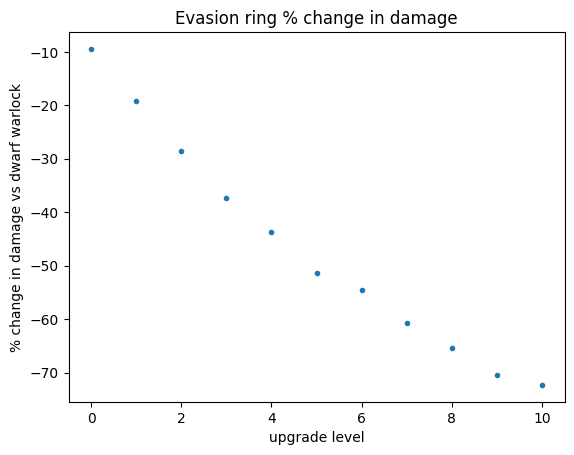

In [174]:
###########################Config variables###########################
creature = Creatures.warlock
armor1 = ArmorInstance(Armors.scale, 1, ArmorAugment.NONE)
hero_level = 18
total_levels=  10
num_simulations = 10000
extra_defenses = []
######################################################################

data = []
for i in range(-1, total_levels + 1):
    evasion_multiplier = 1.125 ** (1 + i)
    turns_data_points = simulate_damage_taken(creature.accuracy, creature.damage, armor1, hero_level, evasion_multiplier, num_simulations, extra_defenses)
    data.append(turns_data_points)

no_evasion_data = data[0]
evasion_data = data[1:]

no_evasion_avg = np.average(no_evasion_data)
evasion_avg = [np.average(x) for x in evasion_data]

evasion_improvement = [calc_percent_change(no_evasion_avg, x) for x in evasion_avg]

plt.title(f'Evasion ring % change in damage')
plt.xlabel('upgrade level')
plt.ylabel(f'% change in damage vs {creature.name}')
plt.plot(range(total_levels + 1), evasion_improvement, '.')



## Accuracy Ring comparison

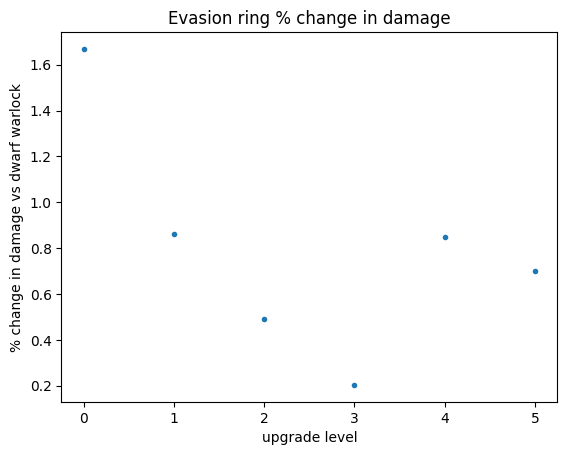

In [175]:
###########################Config variables###########################
creature = Creatures.warlock
armor1 = ArmorInstance(Armors.scale, 1, ArmorAugment.NONE)
hero_level = 18
total_levels=  5
num_simulations = 10000
extra_defenses = []
######################################################################

data = []
for i in range(-1, total_levels + 1):
    turns_data_points = simulate_damage_taken(accuracy, damage_interval, armor1, hero_level, 1, num_simulations, extra_defenses)
    data.append(turns_data_points)

no_evasion_data = data[0]
evasion_data = data[1:]

no_evasion_avg = np.average(no_evasion_data)
evasion_avg = [np.average(x) for x in evasion_data]

evasion_improvement = [calc_percent_change(no_evasion_avg, x) for x in evasion_avg]

plt.title(f'Evasion ring % change in damage')
plt.xlabel('upgrade level')
plt.ylabel(f'% change in damage vs {creature.name}')
plt.plot(range(total_levels + 1), evasion_improvement, '.')



## Plot defense damage reduction

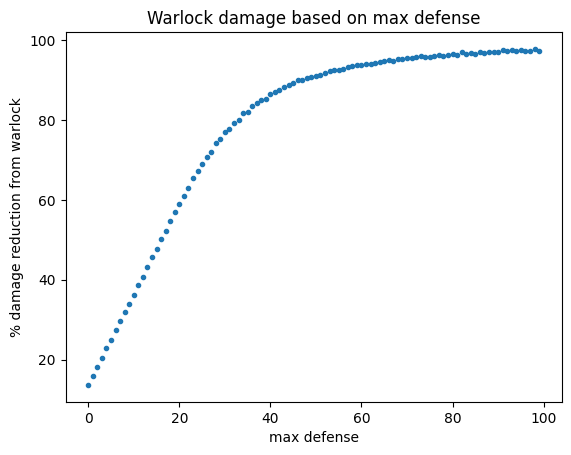

In [176]:
###########################Config variables###########################
damage_interval = Creatures.warlock.damage
num_simulations= 10000
num_plots = 100
bonus_defense = (0, 0)
######################################################################

average_damage = []

for max_defense in range(num_plots):
    turns_data_points = simulate_damage([(0, max_defense), bonus_defense], [damage_interval], 1.0, num_simulations)
    average_damage.append(-calc_percent_change(damage_interval[1], np.average(turns_data_points)))

plt.title("Warlock damage based on max defense")
plt.xlabel("max defense")
plt.ylabel("% damage reduction from warlock")
plt.plot(range(num_plots), average_damage, '.')

## Clover simulations

### Helper Functions

In [177]:
def calc_clover_proc_chance(level):
    return 0.25 * (level + 1)

def get_clover_damage(damage_ranges, clover_level):
    normal_damage = roll_ranges(damage_ranges)
    min_damage = sum([x[0] for x in damage_ranges])
    max_damage = sum([x[1] for x in damage_ranges])
    proc_chance = calc_clover_proc_chance(clover_level)
    return random.choices([normal_damage, min_damage, max_damage], weights=[1-proc_chance, 2/5 * proc_chance, 3/5 * proc_chance])[0]

def simulate_fight(hp, defense_range, damage_range, extra_strength, clover_level, ignore_defense):
    curr_hp = hp
    num_hits = 0
    while(curr_hp > 0):
        damage_roll = get_clover_damage((damage_range, (0, extra_strength)), clover_level)
        (defense_low, defense_high) = defense_range
        defense_roll = 0 if ignore_defense else triangular_discrete(defense_low, defense_high)
        curr_hp -= calc_final_damage(damage_roll, defense_roll)
        num_hits += 1
    return num_hits

def simulate_n_fights(hp, defense_range, damage_range, extra_strength, clover_level, ignore_defense, num_simulations):
    result = []
    for _ in range(num_simulations):
        num_hits = simulate_fight(hp, defense_range, damage_range, extra_strength, clover_level, ignore_defense)
        result.append(num_hits)
    return result

def simulate_clover_efficacy(enemy, damage_range, extra_strength, num_simulations, ignore_defense):
    data_points_clover0 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 0, ignore_defense, num_simulations)
    data_points_clover1 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 1, ignore_defense, num_simulations)
    data_points_clover2 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 2, ignore_defense, num_simulations)
    data_points_clover3 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, 3, ignore_defense, num_simulations)
    data_points_normal = simulate_n_fights(enemy.hp, enemy.armor, damage_range, extra_strength, -1, ignore_defense, num_simulations)

    avg_normal = np.average(data_points_normal)
    avg0 = np.average(data_points_clover0)
    avg1 = np.average(data_points_clover1)
    avg2 = np.average(data_points_clover2)
    avg3 = np.average(data_points_clover3)

    var_normal = np.var(data_points_normal)
    var0 = np.var(data_points_clover0)
    var1 = np.var(data_points_clover1)
    var2 = np.var(data_points_clover2)
    var3 = np.var(data_points_clover3)
    
    
    print(f'Num simulations: {num_simulations}')
    print('Average number of hits')
    print(f'Normal {avg_normal}')
    print(f'Clover +0 {avg0}')
    print(f'Clover +1 {avg1}')
    print(f'Clover +2 {avg2}')
    print(f'Clover +3 {avg3}')
    print(f'Variance:')
    print(f'Normal {var_normal}')
    print(f'Clover +0 {var0}')
    print(f'Clover +1 {var1}')
    print(f'Clover +2 {var2}')
    print(f'Clover +3 {var3}')
    print(f'% change:')
    print(f'Clover +0 {calc_percent_change(avg_normal, avg0)}')
    print(f'Clover +1 {calc_percent_change(avg_normal, avg1)}')
    print(f'Clover +2 {calc_percent_change(avg_normal, avg2)}')
    print(f'Clover +3 {calc_percent_change(avg_normal, avg3)}')
    

### Simulate clover efficacy

In [178]:
###########################Config variables###########################
weapon = WeaponInstance(Weapons.shortsword, 1, WeaponAugment.NONE)
damage_range = calc_damage_interval(weapon)
extra_strength = 3
enemy = Creatures.tengu
num_simulations = 10000
ignore_defense = False
#######################################################################
simulate_clover_efficacy(enemy, damage_range, extra_strength, num_simulations, False)

KeyboardInterrupt: 

### Clover Average improvement and Variance based on upgrade level

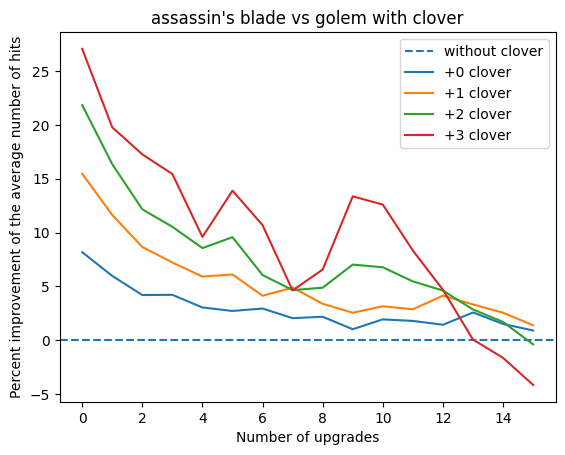

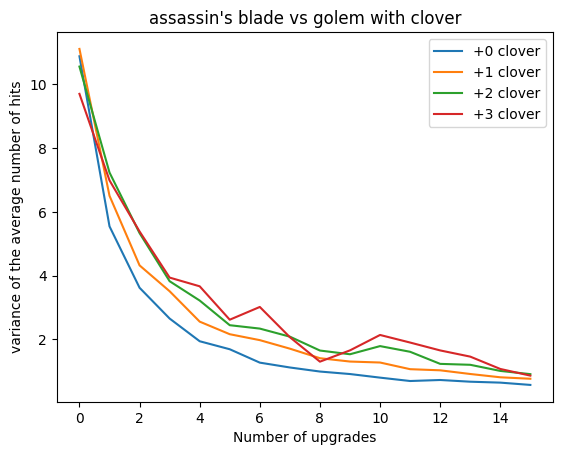

In [ ]:
###########################Config variables###########################
enemy = Creatures.golem
weapon = WeaponInstance(Weapons.assassins_blade, 0, WeaponAugment.NONE)
num_simulations = 2000
num_upgrades = 15
ignore_defense = False
#######################################################################

averages_clover0 = []
averages_clover1 = []
averages_clover2 = []
averages_clover3 = []
vars_clover0 = []
vars_clover1 = []
vars_clover2 = []
vars_clover3 = []

for i in range(num_upgrades + 1):
    weapon.upgrade = i
    damage_range = calc_damage_interval(weapon)

    data_points_clover0 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 0, ignore_defense, num_simulations)
    data_points_clover1 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 1, ignore_defense, num_simulations)
    data_points_clover2 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 2, ignore_defense, num_simulations)
    data_points_clover3 = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, 3, ignore_defense, num_simulations)
    data_points_normal = simulate_n_fights(enemy.hp, enemy.armor, damage_range, 0, -1, ignore_defense, num_simulations)

    average_clover0 = np.average(data_points_clover0)
    average_clover1 = np.average(data_points_clover1)
    average_clover2 = np.average(data_points_clover2)
    average_clover3 = np.average(data_points_clover3)
    average_normal = np.average(data_points_normal)

    var_clover0 = np.var(data_points_clover0)
    var_clover1 = np.var(data_points_clover1)
    var_clover2 = np.var(data_points_clover2)
    var_clover3 = np.var(data_points_clover3)
    var_normal = np.var(data_points_normal)

    averages_clover0.append(-calc_percent_change(average_normal, average_clover0))
    averages_clover1.append(-calc_percent_change(average_normal, average_clover1))
    averages_clover2.append(-calc_percent_change(average_normal, average_clover2))
    averages_clover3.append(-calc_percent_change(average_normal, average_clover3))

    vars_clover0.append(var_clover0)
    vars_clover1.append(var_clover1)
    vars_clover2.append(var_clover2)
    vars_clover3.append(var_clover3)

augment_text = ''
if(weapon.augment == WeaponAugment.DAMAGE):
    augment_text = ' (damage)'
elif(weapon.augment == WeaponAugment.SPEED):
    augment_text = ' (speed)'

plt.title(f"{weapon.weapon.name}{augment_text} vs {enemy.name} with clover")
plt.xlabel("Number of upgrades")
plt.ylabel("Percent improvement of the average number of hits")
plt.axhline(y=0, linestyle='--', label='without clover')
plt.plot(range(num_upgrades + 1), averages_clover0, label='+0 clover')
plt.plot(range(num_upgrades + 1), averages_clover1, label='+1 clover')
plt.plot(range(num_upgrades + 1), averages_clover2, label='+2 clover')
plt.plot(range(num_upgrades + 1), averages_clover3, label='+3 clover')
plt.legend()
plt.show()

plt.title(f"{weapon.weapon.name}{augment_text} vs {enemy.name} with clover")
plt.xlabel("Number of upgrades")
plt.ylabel("variance of the average number of hits")

plt.plot(range(num_upgrades + 1), vars_clover0, label='+0 clover')
plt.plot(range(num_upgrades + 1), vars_clover1, label='+1 clover')
plt.plot(range(num_upgrades + 1), vars_clover2, label='+2 clover')
plt.plot(range(num_upgrades + 1), vars_clover3, label='+3 clover')
plt.legend()
plt.show()




## Equipment upgrade comparisons

In [ ]:

t1 = [
    WeaponInstance(Weapons.worn_shortsword),
    WeaponInstance(Weapons.staff),
    WeaponInstance(Weapons.studded_gloves),
    WeaponInstance(Weapons.rapier),
    WeaponInstance(Weapons.cudgel),
]

t2 = [
    WeaponInstance(Weapons.sickle),
    WeaponInstance(Weapons.shortsword),
    WeaponInstance(Weapons.handaxe),
    WeaponInstance(Weapons.quarterstaff),
    WeaponInstance(Weapons.spear)
]

t3 = [WeaponInstance(Weapons.sword),
    WeaponInstance(Weapons.mace),
    WeaponInstance(Weapons.scimitar),
    WeaponInstance(Weapons.sai),
    WeaponInstance(Weapons.round_shield),
    WeaponInstance(Weapons.whip)
]

t4 = [
    WeaponInstance(Weapons.longsword),
    WeaponInstance(Weapons.battleaxe),
    WeaponInstance(Weapons.runic_blade),
    WeaponInstance(Weapons.crossbow),
    WeaponInstance(Weapons.katana),
    WeaponInstance(Weapons.flail),
]

t5 = [
    WeaponInstance(Weapons.greatsword),
    WeaponInstance(Weapons.warhammer),
    WeaponInstance(Weapons.glaive),
    WeaponInstance(Weapons.greatshield),
    WeaponInstance(Weapons.stone_gauntlet),
    WeaponInstance(Weapons.war_scythe)
]


def get_hero_accuracy(hero: Hero):
    return hero.level + 9

def get_hero_evasion(hero: Hero):
    return hero.level + 4

def get_hero_max_hp(hero: Hero):
    return hero.level * 5 + 15

def simulate_encounter(hero: Hero,
                       enemy: CreatureInstance,
                       ignore_enemy_evasion: bool = False,
                       hero_first: bool = True,
                       turn_limit: float = math.inf,
                       debug: bool = False
                       ) -> int:
    hp_threshold = 1000
    num_retaliations = 0
    if not hero_first:
        # set the enemy turn back 1 turn so it has 1 extra whole turn. Assumes last action the hero did took 1 whole turn
        enemy.turn -= 1
    
    while enemy.damage_taken < enemy.creature.hp\
        and hero.damage_taken < hp_threshold\
        and (hero.turn < turn_limit or enemy.turn < turn_limit):
        # check the turn. Prioritize the hero if equal
        if hero.turn <= enemy.turn:
            hero_attacks_enemy(hero, enemy, ignore_enemy_evasion, debug)
        else:
            num_retaliations += 1
            enemy_attacks_hero(hero, enemy, debug)
    
    if enemy.creature is Creatures.skeleton:
        hero.damage_taken += roll_skeleton_explosion_damage_taken(hero.get_defense_intervals())
    return num_retaliations
    
def reset_hero(hero: Hero):
    hero.damage_taken = 0
    hero.turn = hero.turn % -1

def simulate_n_encounters(hero: Hero, enemy: Creature, num_simulations: int, ignore_enemy_evasion: bool = False, hero_first: bool = True):
    turns_data_points = []
    damage_taken_data_points = []
    num_retaliations = []
    for _ in range(num_simulations):
        # this is either 0 or a negative number
        extra_turn = hero.turn
        enemy_instance = CreatureInstance(enemy)
        retaliations = simulate_encounter(hero, enemy_instance, ignore_enemy_evasion, hero_first)
        # we subtract extra turn to cancel out the extra turn we got from a previous fight so it doesn't get counted twice
        turns_data_points.append(hero.turn - extra_turn)
        damage_taken_data_points.append(hero.damage_taken)
        num_retaliations.append(retaliations)
        reset_hero(hero)
    return (turns_data_points, damage_taken_data_points, num_retaliations)

### Weapon comparisons

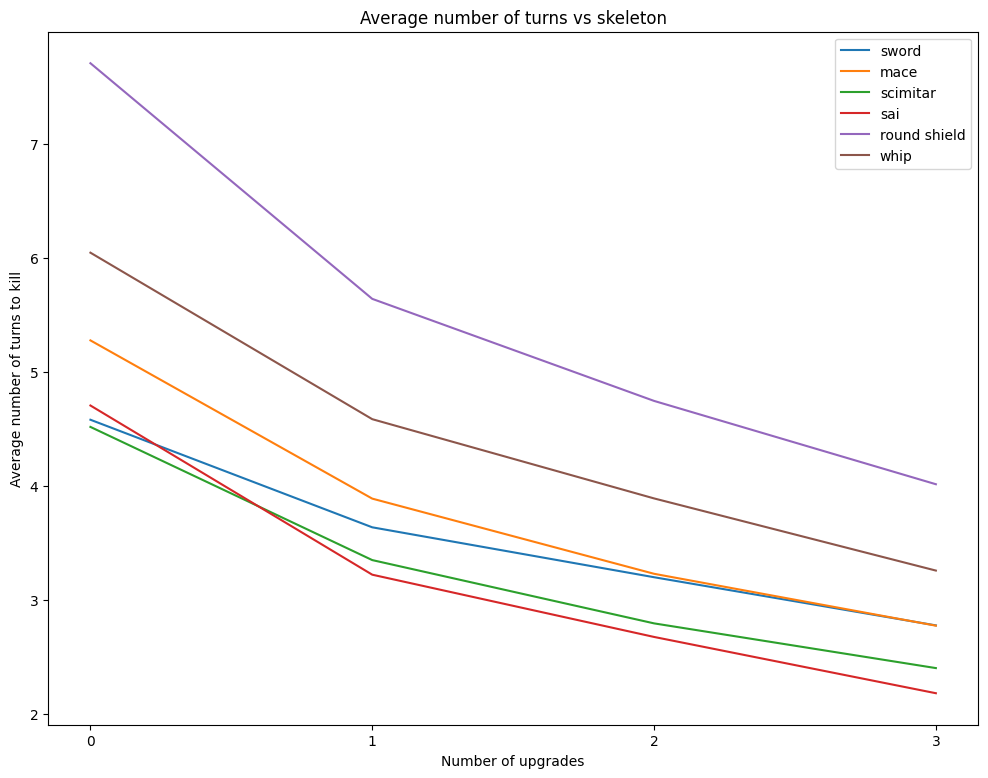

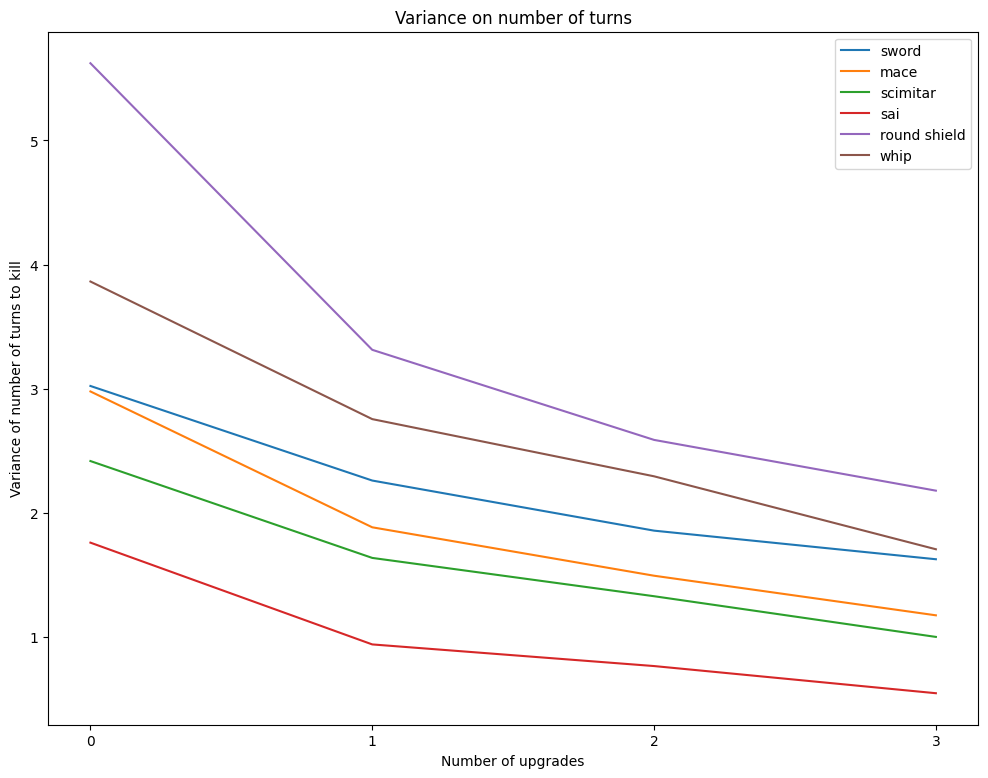

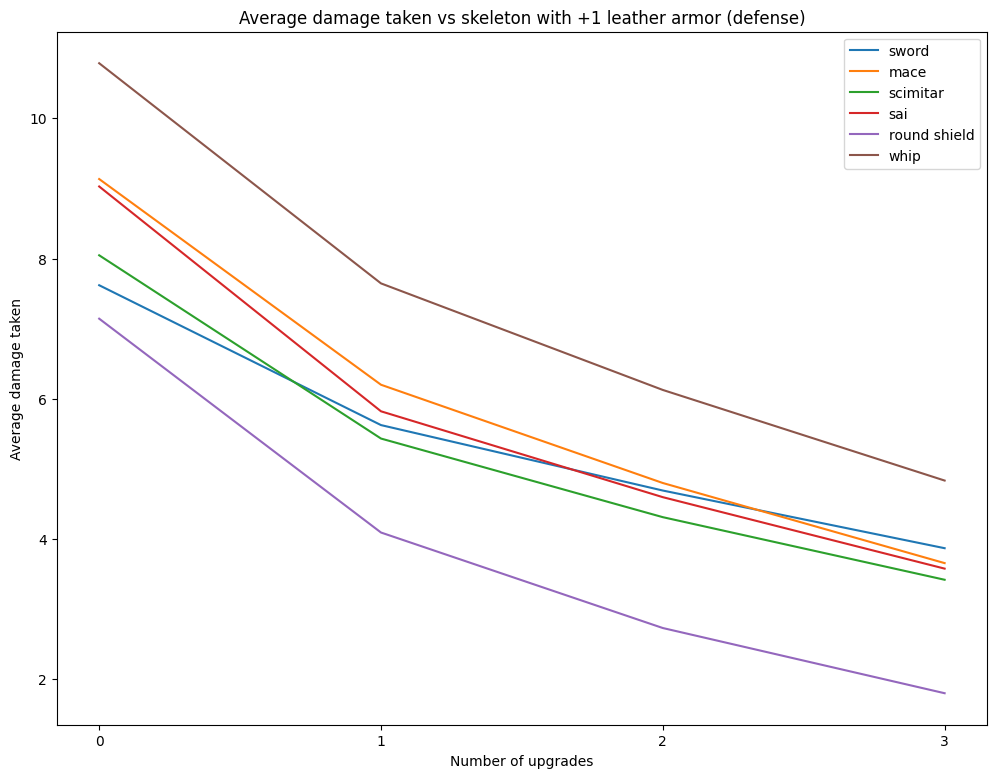

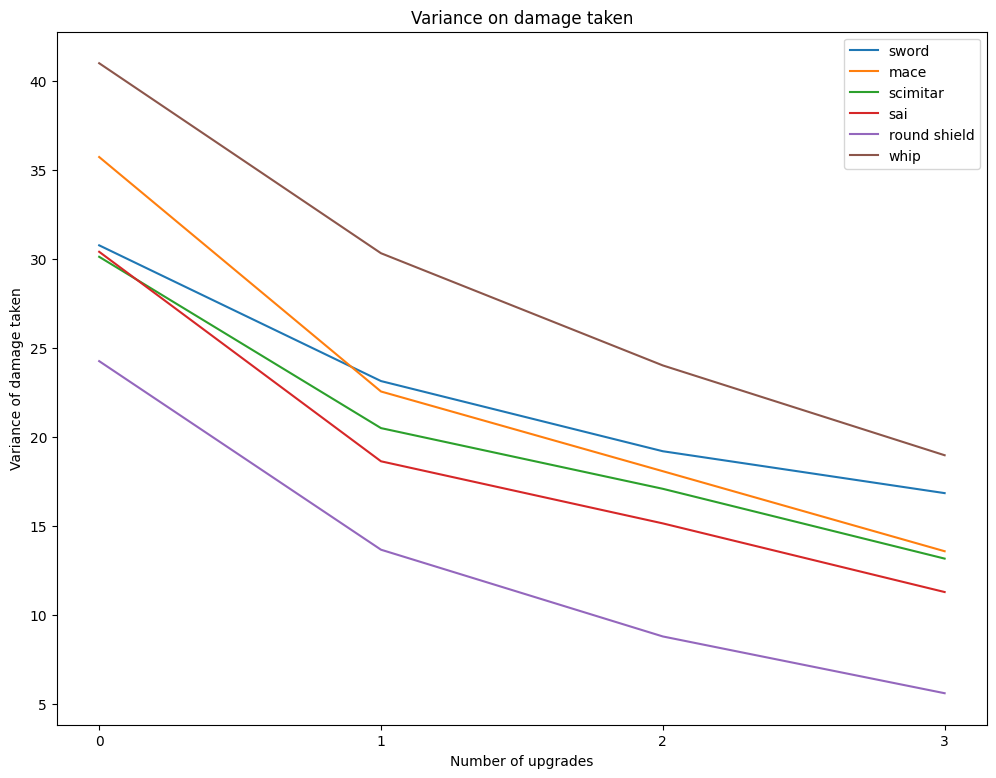

In [ ]:
###########################Config variables###########################
enemy = Creatures.skeleton
weapons = t3
hero_level = 7
strength = 14
armor = ArmorInstance(Armors.leather, 1, ArmorAugment.DEFENSE)
num_simulations = 5000
num_upgrades: tuple[int, int] = (0,3)

ignore_enemy_evasion = False
hero_first = True
#########################################################################

num_turns_data = []
damage_taken_data = []

for weapon in weapons:
    num_turns_results = []
    damage_taken_results = []
    hero = Hero(hero_level, strength, armor, weapon)
    for i in range(num_upgrades[0], num_upgrades[1] + 1):
        hero.weapon.upgrade = i
        turns_data_points, damage_taken_data_points, _ = simulate_n_encounters(hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)
        num_turns_results.append(turns_data_points)
        damage_taken_results.append(damage_taken_data_points)
    num_turns_data.append(num_turns_results)
    damage_taken_data.append(damage_taken_results)

plt.figure(figsize=(12,9))
plt.title(f'Average number of turns vs {enemy.name}')
plt.xlabel("Number of upgrades")
plt.ylabel("Average number of turns to kill")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.average(x) for x in num_turns_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title('Variance on number of turns')
plt.xlabel("Number of upgrades")
plt.ylabel("Variance of number of turns to kill")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.var(x) for x in num_turns_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title(f'Average damage taken vs {enemy.name} with {armor.get_full_name()}')
plt.xlabel("Number of upgrades")
plt.ylabel("Average damage taken")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.average(x) for x in damage_taken_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.title('Variance on damage taken')
plt.xlabel("Number of upgrades")
plt.ylabel("Variance of damage taken")
for i in range(len(weapons)):
    plt.plot(range(num_upgrades[0], num_upgrades[1] + 1), [np.var(x) for x in damage_taken_data[i]], label=weapons[i].get_name_and_aug())
plt.xticks(range(num_upgrades[0], num_upgrades[1] + 1))
plt.legend()
plt.show()


### Upgrade priority

In [ ]:
###########################Config variables###########################
enemy = Creatures.bat
hero_level = 13
strength = 15
weapon = WeaponInstance(Weapons.flail, 1)
armor = ArmorInstance(Armors.scale, 1, ArmorAugment.NONE)
num_simulations = 1000

ignore_enemy_evasion = False
hero_first = True
omit_last_hit = False
#########################################################################

hero = Hero(hero_level, strength, armor, weapon)

print(f'Enemy: {enemy.name}')
print(f'Current gear: {hero.weapon.get_full_name()} and {hero.armor.get_full_name()}')

num_turns_data, damage_taken_data, _ = simulate_n_encounters(hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)
avg_damage_taken = np.average(damage_taken_data)
var_damage_taken = np.var(damage_taken_data)

print(f'Current gear average damage taken: {avg_damage_taken}')
print(f'Current gear variance damage taken: {var_damage_taken}')

hero.armor.upgrade += 1
up_armor_num_turns_data, up_armor_damage_taken_data, _ = simulate_n_encounters(hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)
up_armor_avg_damage_taken = np.average(up_armor_damage_taken_data)
up_armor_var_damage_taken = np.var(up_armor_damage_taken_data)

print(f'Upgrade armor average damage taken: {up_armor_avg_damage_taken}')
print(f'Upgrade armor variance damage taken: {up_armor_var_damage_taken}')

hero.armor.upgrade -= 1
hero.weapon.upgrade += 1
up_weapon_num_turns_data, up_weapon_damage_taken_data, _ = simulate_n_encounters(hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)
up_weapon_avg_damage_taken = np.average(up_weapon_damage_taken_data)
up_weapon_var_damage_taken = np.var(up_weapon_damage_taken_data)

print(f'Upgrade weapon average damage taken: {up_weapon_avg_damage_taken}')
print(f'Upgrade weapon variance damage taken: {up_weapon_var_damage_taken}')

improvement = calc_percent_change(up_weapon_avg_damage_taken, up_armor_avg_damage_taken) if up_weapon_avg_damage_taken < up_armor_avg_damage_taken else calc_percent_change(up_armor_avg_damage_taken, up_weapon_avg_damage_taken)

print(f'Upgrading {"weapon" if up_weapon_avg_damage_taken < up_armor_avg_damage_taken else "armor"} is better by {improvement}%')


Enemy: vampire bat
Current gear: +1 flail and +1 scale armor
Current gear average damage taken: 8.922
Current gear variance damage taken: 112.087916
Upgrade armor average damage taken: 7.948
Upgrade armor variance damage taken: 103.031296
Upgrade weapon average damage taken: 7.222
Upgrade weapon variance damage taken: 90.136716
Upgrading weapon is better by 10.05261700360011%


### Equipment set general comparison

In [ ]:
###########################Config variables###########################
enemy = Creatures.skeleton
hero_level = 7
strength = 12

###########################Equipment set 1###########################
weapon1 = WeaponInstance(Weapons.shortsword, 1)
armor1 = ArmorInstance(Armors.leather, 2, ArmorAugment.EVASION)
######################################################################

###########################Equipment set 2############################
weapon2 = WeaponInstance(Weapons.shortsword, 1)
armor2 = ArmorInstance(Armors.leather, 2, ArmorAugment.DEFENSE)
######################################################################

num_simulations = 10000

ignore_enemy_evasion = False
hero_first = True
omit_last_hit = False
#########################################################################

hero1 = Hero(hero_level, strength, armor1, weapon1)

num_turns_data1, damage_taken_data1, _ = simulate_n_encounters(hero1, enemy, num_simulations, ignore_enemy_evasion, hero_first)
avg_damage_taken1 = np.average(damage_taken_data1)
var_damage_taken1 = np.var(damage_taken_data1)

print(f'Average damage taken for hero 1: {avg_damage_taken1}')

hero2 = Hero(hero_level, strength, armor2, weapon2)
num_turns_data2, damage_taken_data2, _ = simulate_n_encounters(hero2, enemy, num_simulations, ignore_enemy_evasion, hero_first)
avg_damage_taken2 = np.average(damage_taken_data2)
var_damage_taken2 = np.var(damage_taken_data2)

print(f'Average damage taken for hero 2: {avg_damage_taken2}')

print(f'Percent change of hero 2 from hero 1: {calc_percent_change(avg_damage_taken1, avg_damage_taken2)}% or hero1 from hero {calc_percent_change(avg_damage_taken2, avg_damage_taken1)}%')

Average damage taken for hero 1: 7.4526
Average damage taken for hero 2: 8.1541
Percent change of hero 2 from hero 1: 9.41282237071625% or hero1 from hero -8.603034056486914%


## Guard pull simulation
The goal for this simulation is to determine what the best strategy is for when the guard pulls you. Should you run away, then find a pillar to continuously surprise attack it, or should you fight the guard while crippled, then find a pillar?

### Helper functions

In [ ]:
def simulate_run_from_guard(hero: Hero, enemy: CreatureInstance, debug: bool = False):
    # pull + attack
    enemy_attacks_hero(hero, enemy, debug)
    # chase attack x 2
    enemy_attacks_hero(hero, enemy, debug)
    enemy_attacks_hero(hero, enemy, debug)

    # hero moved for 4 turns of cripple. Don't include pull attack as a turn
    hero.turn += 4
    enemy.turn = 4

    # surprise attack all the time
    simulate_encounter(hero, enemy, True, True, debug=debug)



def simulate_trade_blows(hero: Hero, enemy: CreatureInstance, debug: bool = False):
    # pull + attack    
    # guard and hero attacks each other no surprise for 4 turns
    simulate_encounter(hero, enemy, ignore_enemy_evasion=False, hero_first=False, turn_limit=4.0, debug = debug)

    # guard and hero attacks each other surprise
    simulate_encounter(hero, enemy, ignore_enemy_evasion=True, hero_first=True, debug = debug)

def simulate_n_run_from_guard(hero: Hero, enemy: Creature, num_simulations: int):
    turns_data_points = []
    damage_taken_data_points = []
    hero.damage_taken = 0
    hero.turn = 0
    for _ in range(num_simulations):
        extra_turn = hero.turn
        enemy_instance = CreatureInstance(enemy)
        simulate_run_from_guard(hero, enemy_instance)
        turns_data_points.append(hero.turn - extra_turn)
        damage_taken_data_points.append(hero.damage_taken)
        reset_hero(hero)
    return (turns_data_points, damage_taken_data_points)

def simulate_n_trade_blows(hero: Hero, enemy: Creature, num_simulations: int):
    turns_data_points = []
    damage_taken_data_points = []
    hero.damage_taken = 0
    hero.turn = 0
    for _ in range(num_simulations):
        extra_turn = hero.turn
        enemy_instance = CreatureInstance(enemy)
        simulate_trade_blows(hero, enemy_instance)
        turns_data_points.append(hero.turn - extra_turn)
        damage_taken_data_points.append(hero.damage_taken)
        reset_hero(hero)
    return (turns_data_points, damage_taken_data_points)

### Simulation

In [ ]:
###########################Config variables###########################
hero_level = 8
strength = 13
num_simulations = 10000

###########################Equipment set 1###########################
weapon = WeaponInstance(Weapons.shortsword, 1)
armor = ArmorInstance(Armors.mail, 1, ArmorAugment.DEFENSE)
######################################################################

enemy = Creatures.guard
hero = Hero(hero_level, strength, armor, weapon)

_, damage_taken_data_run = simulate_n_run_from_guard(hero, enemy, num_simulations)
_, damage_taken_data_fight = simulate_n_trade_blows(hero, enemy, num_simulations)

print(f'Enemy: {enemy.name}')
print(f'Hero is at level {hero_level} and has {strength} strength')
print(f'Current gear: {hero.weapon.get_full_name()} and {hero.armor.get_full_name()}')
print(f'"Run" strategy average damage taken: {np.average(damage_taken_data_run)}')
print(f'"Fight" strategy average damage taken: {np.average(damage_taken_data_fight)}')

Enemy: guard
Hero is at level 8 and has 13 strength
Current gear: +1 shortsword and +1 mail armor (defense)
"Run" strategy average damage taken: 23.0332
"Fight" strategy average damage taken: 20.5117


## Stone glyph

### Simple comparisons

In [ ]:
###########################Config variables###########################
enemy = Creatures.ghoul
hero_level = 18
weapon = WeaponInstance(Weapons.worn_shortsword)
armor = ArmorInstance(Armors.mail, 3, ArmorAugment.EVASION)
num_attacks = 10000
######################################################################
hero = Hero(hero_level, 21, armor, weapon)

normal_damage_data = []
stone_damage_data = []


for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    normal_damage_data.append(hero.damage_taken)
    reset_hero(hero)

armor.isStone = True
for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    stone_damage_data.append(hero.damage_taken)
    reset_hero(hero)

no_stone_average = np.average(normal_damage_data)
stone_average = np.average(stone_damage_data)
print(f'Average damage taken per hit without stone: {no_stone_average}')
print(f'Average damage taken per hit with stone: {stone_average}')
print(f'% change of average damage taken per hit: {calc_percent_change(no_stone_average, stone_average)}')
print(f'Variance of damage taken per hit without stone: {np.var(normal_damage_data)}')
print(f'Variance of damage taken per hit with stone: {np.var(stone_damage_data)}')

Average damage taken per hit without stone: 6.7401
Average damage taken per hit with stone: 9.577003125
% change of average damage taken per hit: 42.089926336404496
Variance of damage taken per hit without stone: 76.81015199000001
Variance of damage taken per hit with stone: 0.7155444445214844


### Augmentation comparisons

In [ ]:
###########################Config variables###########################
enemy = Creatures.ghoul
hero_level = 18
weapon = WeaponInstance(Weapons.shortsword)
armor = ArmorInstance(Armors.scale, 1, ArmorAugment.NONE, isStone=True)
num_attacks = 10000
######################################################################
hero = Hero(hero_level, 21, armor, weapon)

no_aug_data = []
defense_data = []
evasion_data = []

for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    no_aug_data.append(hero.damage_taken)
    reset_hero(hero)

armor.augment = ArmorAugment.DEFENSE

for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    defense_data.append(hero.damage_taken)
    reset_hero(hero)

armor.augment = ArmorAugment.EVASION

for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    evasion_data.append(hero.damage_taken)
    reset_hero(hero)

print(f'Average damage taken per hit with stone no aug: {np.average(no_aug_data)}')
print(f'Average damage taken per hit with stone defense aug: {np.average(defense_data)}')
print(f'Average damage taken per hit with stone evasion aug: {np.average(evasion_data)}')

Average damage taken per hit with stone no aug: 10.502559375
Average damage taken per hit with stone defense aug: 10.8672
Average damage taken per hit with stone evasion aug: 9.981314285714285


### Evasion and Arcana

In [ ]:
###########################Config variables###########################
enemy = Creatures.ghoul
hero_level = 18
weapon = WeaponInstance(Weapons.shortsword)
armor = ArmorInstance(Armors.mail, 3, ArmorAugment.EVASION)
num_attacks = 10000
# 0 if no ring. a +0 ring is 1
evasion_boost = 0
arcana_boost = 0
######################################################################
evasion_multiplier = 1.125 ** evasion_boost
arcana_multiplier = 1.175 ** arcana_boost
hero = Hero(hero_level, 21, armor, weapon, evasion_multiplier=evasion_multiplier, arcana_multiplier=arcana_multiplier)

normal_damage_data = []
boosted_damage_data = []

for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    normal_damage_data.append(hero.damage_taken)
    reset_hero(hero)

hero.armor.isStone = True

for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    boosted_damage_data.append(hero.damage_taken)
    reset_hero(hero)

regular_average_damage = np.average(normal_damage_data)
boosted_average_damage = np.average(boosted_damage_data)

print(f'Damage taken without stone: {np.average(regular_average_damage)}')
print(f'Damage taken with stone with arcana boost {arcana_boost} and evasion boost {evasion_boost}: {np.average(boosted_average_damage)}')

Damage taken without stone: 6.6474
Damage taken with stone with arcana boost 0 and evasion boost 0: 9.576153125


### Normal armor vs stone boosted armor

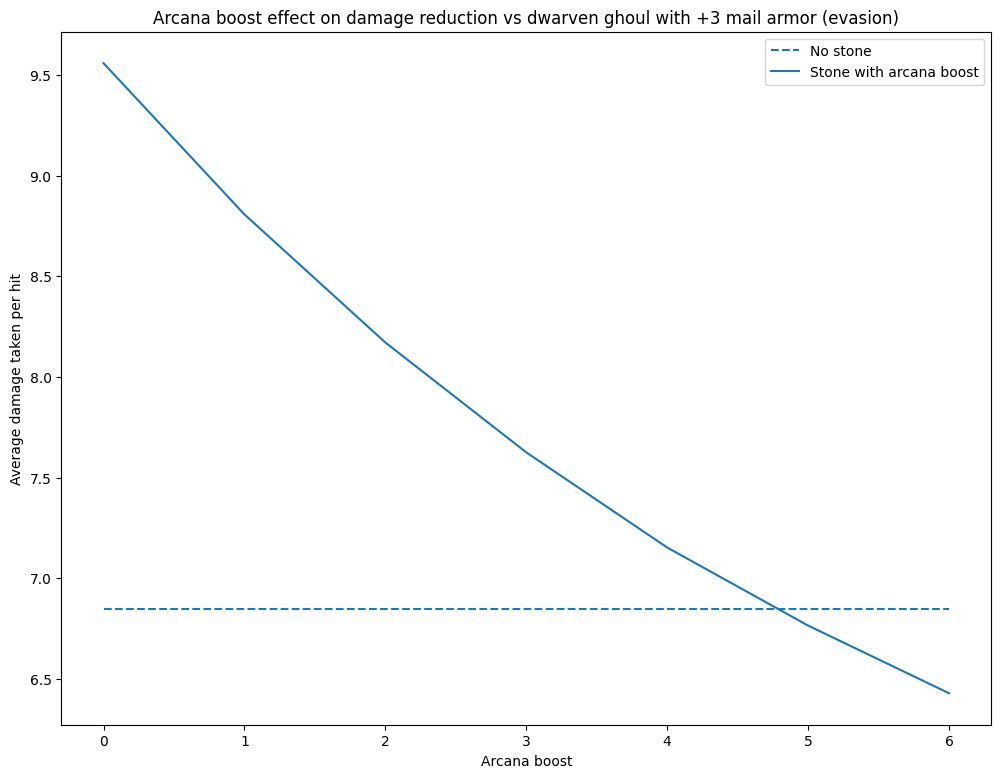

In [ ]:
###########################Config variables###########################
enemy = Creatures.ghoul
hero_level = 18
weapon = WeaponInstance(Weapons.shortsword)
armor = ArmorInstance(Armors.mail, 3, ArmorAugment.EVASION)
arcana_boost_range = [0, 6]
num_attacks = 10000
# 0 if no ring. a +0 ring is 1
evasion_boost = 0
######################################################################
evasion_multiplier = 1.125 ** evasion_boost
arcana_multiplier = 1.175 ** arcana_boost
hero = Hero(hero_level, 21, armor, weapon, evasion_multiplier=evasion_multiplier)

normal_damage_data = []
boosted_damage_data_list = []

for _ in range(num_attacks):
    enemy_instance = CreatureInstance(enemy)
    enemy_attacks_hero(hero, enemy_instance)
    normal_damage_data.append(hero.damage_taken)
    reset_hero(hero)

hero.armor.isStone = True

for i in range(arcana_boost_range[0], arcana_boost_range[1] + 1):
    hero.arcana_multiplier = 1.175 ** i
    boosted_damage_data = []
    for _ in range(num_attacks):
        enemy_instance = CreatureInstance(enemy)
        enemy_attacks_hero(hero, enemy_instance)
        boosted_damage_data.append(hero.damage_taken)
        reset_hero(hero)
    boosted_damage_data_list.append(boosted_damage_data)

plt.figure(figsize=(12,9))
plt.title(f'Arcana boost effect on damage reduction vs {enemy.name} with {armor.get_full_name()}')
plt.xlabel("Arcana boost")
plt.ylabel("Average damage taken per hit")
plt.hlines(np.average(normal_damage_data), arcana_boost_range[0], arcana_boost_range[1], label='No stone', linestyles='dashed')
plt.plot(range(arcana_boost_range[0], arcana_boost_range[1] + 1), [np.average(x) for x in boosted_damage_data_list], label='Stone with arcana boost')
plt.xticks(range(arcana_boost_range[0], arcana_boost_range[1] + 1))
plt.legend()
plt.show()

## Accuracy and Furor ring comparisons

### Simple comparison

In [ ]:
###########################Config variables###########################
enemy = Creatures.skeleton
hero_level = 7
strength = 12
weapon = WeaponInstance(Weapons.shortsword)
accuracy_boost = 1
attack_speed_boost = 1
num_simulations = 5000
ignore_enemy_evasion = False
hero_first = True
######################################################################
accuracy_multiplier = accuracy_ring_multiplier(accuracy_boost)
attack_speed_multiplier = furor_ring_multiplier(attack_speed_boost)

armor = ArmorInstance(Armors.cloth, 0, ArmorAugment.NONE)

hero = Hero(hero_level, strength, armor, weapon)
accurate_hero = Hero(hero_level, strength, armor, weapon, accuracy_multiplier=accuracy_multiplier)
fast_hero = Hero(hero_level, strength, armor, weapon, attack_speed_multiplier=attack_speed_multiplier)

turns_data, damage_taken_data, num_retaliations = simulate_n_encounters(hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)
turns_data_accurate, damage_taken_data_accurate, num_retaliations_accurate = simulate_n_encounters(accurate_hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)
turns_data_fast, damage_taken_data_fast, num_retaliations_fast = simulate_n_encounters(fast_hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)

print(f'Average number of retaliations: {np.average(num_retaliations)}')
print(f'Average number of retaliations for accurate: {np.average(num_retaliations_accurate)}')
print(f'Average number of retaliations for fast: {np.average(num_retaliations_fast)}')

Average number of retaliations: 5.4524
Average number of retaliations for accurate: 5.0268
Average number of retaliations for fast: 5.0592


### Upgrade comparisons

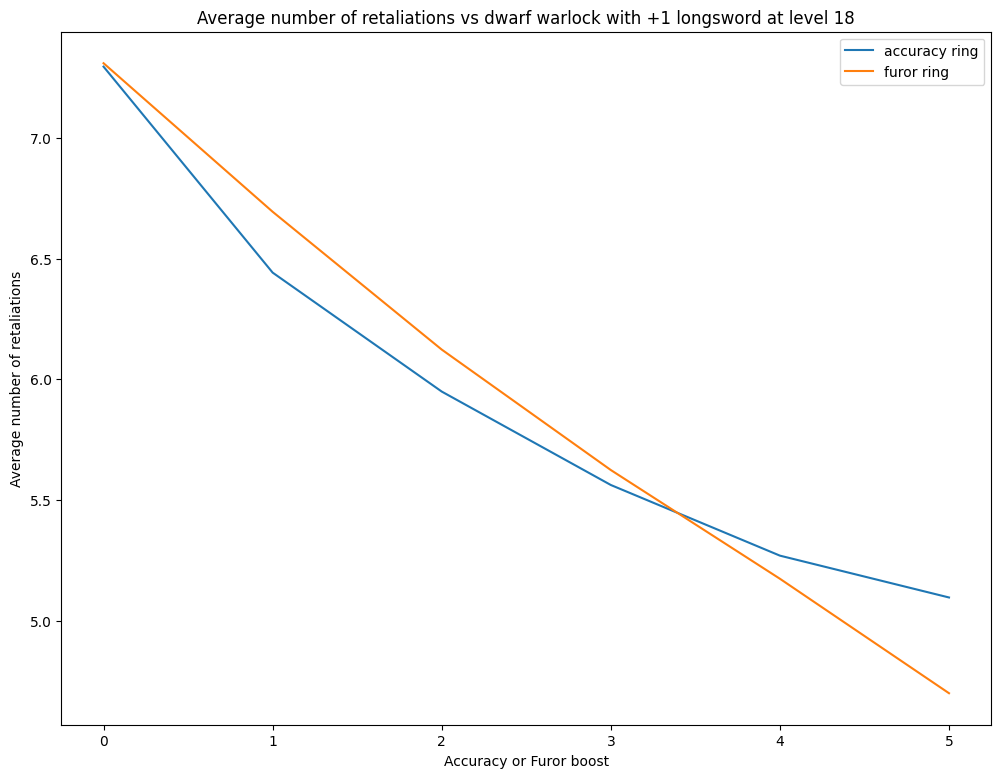

In [ ]:
###########################Config variables###########################
enemy = Creatures.warlock
hero_level = 18
strength = 16
weapon = WeaponInstance(Weapons.longsword, 1)
boost_range = [0, 5]
num_simulations = 5000
hero_first = True
######################################################################

ignore_enemy_evasion = False
armor = ArmorInstance(Armors.cloth, 0, ArmorAugment.NONE)

accuracy_data = []
furor_data = []

for i in range(boost_range[0], boost_range[1] + 1):
    accuracy_multiplier = accuracy_ring_multiplier(i)
    attack_speed_multiplier = furor_ring_multiplier(i)

    accurate_hero = Hero(hero_level, strength, armor, weapon, accuracy_multiplier=accuracy_multiplier)
    fast_hero = Hero(hero_level, strength, armor, weapon, attack_speed_multiplier=attack_speed_multiplier)

    _,_,num_retaliations_accurate = simulate_n_encounters(accurate_hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)
    _,_,num_retaliations_fast = simulate_n_encounters(fast_hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)

    accuracy_data.append(num_retaliations_accurate)
    furor_data.append(num_retaliations_fast)

plt.figure(figsize=(12,9))
plt.title(f'Average number of retaliations vs {enemy.name} with {weapon.get_full_name()} at level {hero_level}')
plt.xlabel("Accuracy or Furor boost")
plt.ylabel("Average number of retaliations")
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x) for x in accuracy_data], label='accuracy ring')
plt.plot(range(boost_range[0], boost_range[1] + 1), [np.average(x) for x in furor_data], label='furor ring')
plt.xticks(range(boost_range[0], boost_range[1] + 1))
plt.legend()
plt.show()

### Upgrade priority accuracy

In [ ]:
###########################Config variables###########################
enemy = Creatures.ghoul
hero_level = 18
strength = 16
weapon = WeaponInstance(Weapons.longsword, 0)
boost = 1
num_upgrades = 15
num_simulations = 5000
hero_first = True
######################################################################

ignore_enemy_evasion = False
armor = ArmorInstance(Armors.cloth, 0, ArmorAugment.NONE)
######################################################################

print(f'Enemy: {enemy.name}')
boost_increase = 0
weapon_increase = 0

for _ in range(num_upgrades):
    # accuracy ring upgrade
    acc_multi = accuracy_ring_multiplier(boost + boost_increase + 1)
    weapon_copy = replace(weapon, upgrade=weapon.upgrade + weapon_increase)
    hero = Hero(hero_level, strength, armor, weapon_copy, accuracy_multiplier=acc_multi)
    _,_,num_retaliations_accuracy = simulate_n_encounters(hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)
    # weapon upgrade
    acc_multi = accuracy_ring_multiplier(boost + boost_increase)
    weapon_copy = replace(weapon, upgrade=weapon.upgrade + weapon_increase + 1)
    hero = Hero(hero_level, strength, armor, weapon_copy, accuracy_multiplier=acc_multi)
    _,_,num_retaliations_weapon = simulate_n_encounters(hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)

    weapon_average = np.average(num_retaliations_weapon)
    ring_average = np.average(num_retaliations_accuracy)
    # print(f'Weapon: {weapon_average} Ring: {ring_average}')
    # less retaliations the better
    if weapon_average <= ring_average:
        print('upgrade weapon')
        weapon_increase += 1
    else:
        print('upgrade accuracy ring')
        boost_increase += 1

print(f'Allocate {boost_increase} upgrades into +{boost - 1} ring and {weapon_increase} upgrades into {weapon.get_full_name()}')


Enemy: dwarven ghoul
upgrade weapon
upgrade weapon
upgrade weapon
upgrade accuracy ring
upgrade weapon
upgrade weapon
upgrade weapon
upgrade weapon
upgrade accuracy ring
upgrade weapon
upgrade weapon
upgrade weapon
upgrade weapon
upgrade accuracy ring
upgrade weapon
Allocate 3 upgrades into +0 ring and 12 upgrades into +0 longsword


### ferret tuft improvements

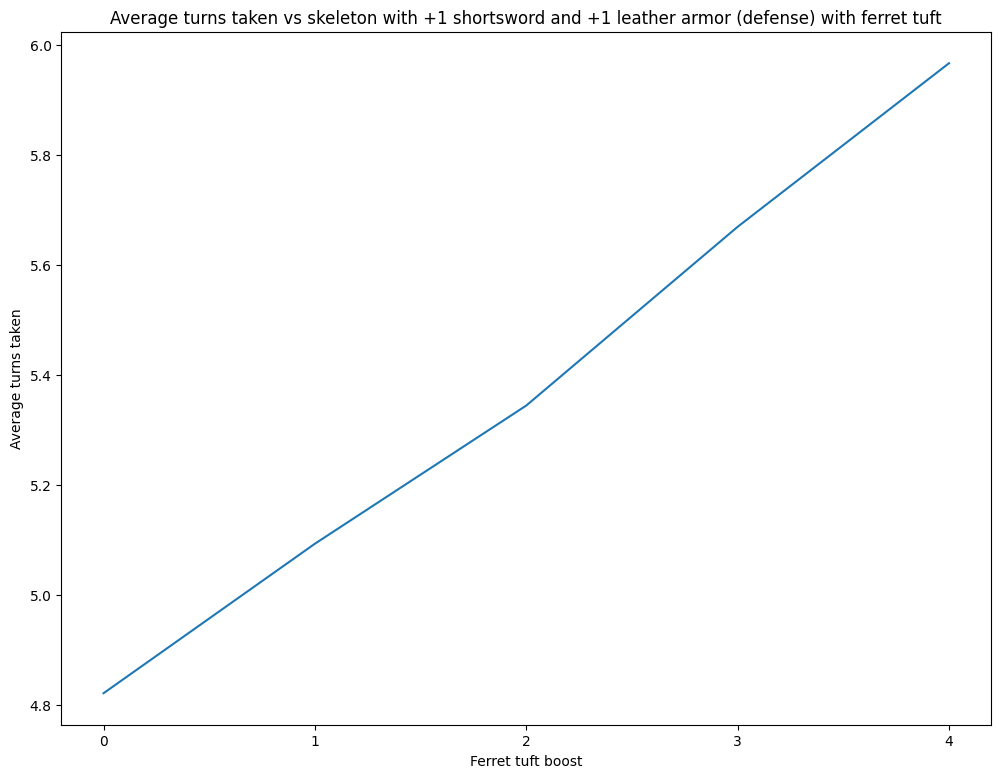

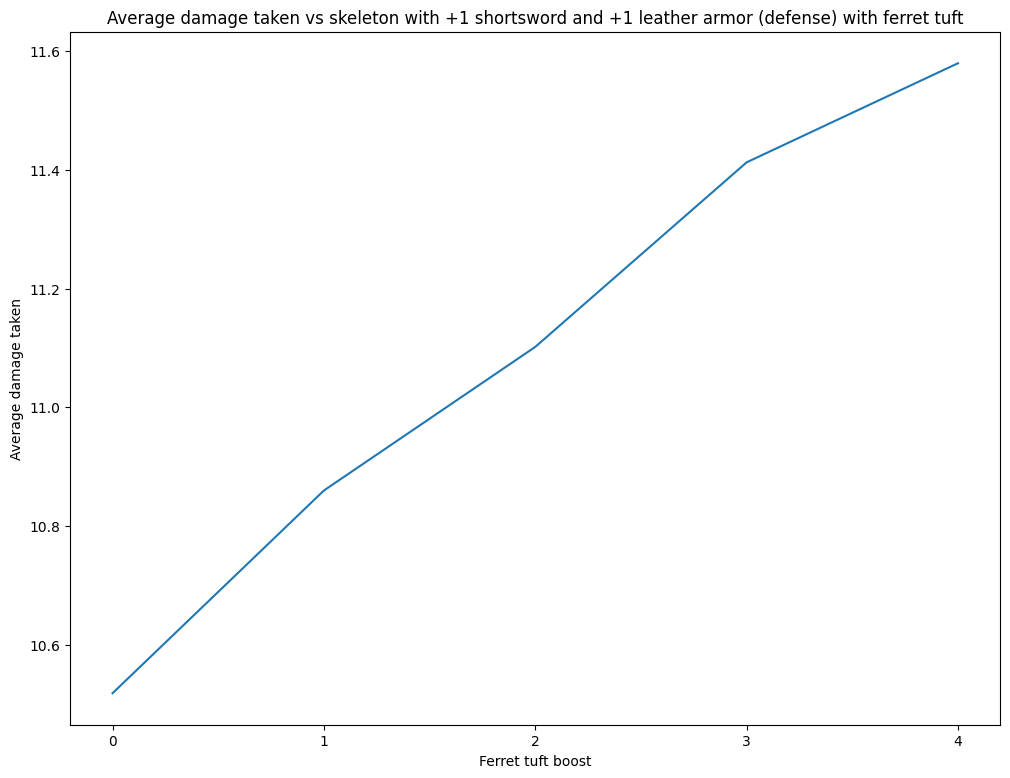

In [ ]:
###########################Config variables###########################
enemy = Creatures.skeleton
hero_level = 7
strength = 12
weapon = WeaponInstance(Weapons.shortsword, 1)
armor = ArmorInstance(Armors.leather, 1, ArmorAugment.EVASION)
num_simulations = 5000
hero_first = True
######################################################################
ignore_enemy_evasion = False
######################################################################
trinket_num_boosts = 5

turns_data_whole = []
damage_taken_data_whole = []
num_retaliations_whole = []
for tuft_boost in range(0, trinket_num_boosts):
    hero = Hero(hero_level, strength, armor, weapon, ferret_tuft_boost=tuft_boost)
    turns_data, damage_taken_data, num_retaliations = simulate_n_encounters(hero, enemy, num_simulations, ignore_enemy_evasion, hero_first)
    turns_data_whole.append(turns_data)
    damage_taken_data_whole.append(damage_taken_data)
    num_retaliations_whole.append(num_retaliations)

plt.figure(figsize=(12,9))
plt.title(f'Average turns taken vs {enemy.name} with {weapon.get_full_name()} and {armor.get_full_name()} with ferret tuft')
plt.xlabel("Ferret tuft boost")
plt.ylabel("Average turns taken")
plt.plot(range(trinket_num_boosts), [np.average(x) for x in turns_data_whole])
plt.xticks(range(trinket_num_boosts))
plt.show()

plt.figure(figsize=(12,9))
plt.title(f'Average damage taken vs {enemy.name} with {weapon.get_full_name()} and {armor.get_full_name()} with ferret tuft')
plt.xlabel("Ferret tuft boost")
plt.ylabel("Average damage taken")
plt.plot(range(trinket_num_boosts), [np.average(x) for x in damage_taken_data_whole])
plt.xticks(range(trinket_num_boosts))
plt.show()
